In [1]:
	!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cansugrel","key":"e615968685c1edf275d01c610986634f"}'}

In [9]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d ashwingupta3012/male-and-female-faces-dataset

 99% 1.62G/1.63G [00:11<00:00, 143MB/s]
100% 1.63G/1.63G [00:11<00:00, 150MB/s]


In [12]:
from zipfile import ZipFile
file_name = 'male-and-female-faces-dataset.zip' 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [13]:
import numpy as np #numerical python
import cv2
from glob import glob
import matplotlib.pyplot as plt

In [14]:
fpath = glob('/content/Male and Female face dataset/Female Faces/*.jpg') # this will return all images path in a list
mpath = glob('/content/Male and Female face dataset/Male Faces/*.jpg')

[[ 784   66 1119 1119]]


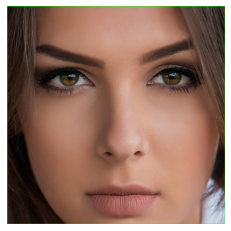

In [16]:
### Step-1 Read Image and Convert to RGB
img = cv2.imread(fpath[0]) # read image in BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # this step will convert image from BGR to RGB


### Step-2 Apply Haar Cascade Classifier
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
faces_list = haar.detectMultiScale(gray)
print(faces_list)
for x,y,w,h in faces_list:
    cv2.rectangle(img_rgb, (x,y), (x+w,y+h),(0,255,0),2)
    ### Step-3 Crop Face
    roi = img_rgb[y:y+h, x:x+w]

    plt.imshow(roi)
    plt.axis('off')
    plt.show()

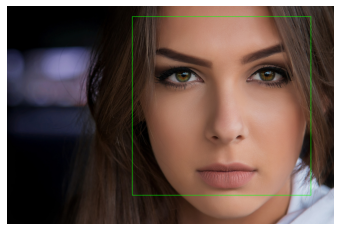

In [17]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()